In [4]:
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd

In [5]:
SPINE_COLOR = "grey"
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    fig_width = 3.37
    fig_height = 1.5


    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
            #   'text.latex.preamble': [r'\usepackage{gensymb}'],
              'axes.labelsize': 9, # fontsize for x and y labels (was 10)
              'axes.titlesize': 9,
              'font.size': 9, # was 10
              'legend.fontsize': 9, # was 10
              'xtick.labelsize': 9,
              'ytick.labelsize': 9,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)

def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

In [6]:
with xr.open_dataset('/home/patel_zeel/aqmsp/aqmsp_data/datasets/cpcb/ijcai24/data.nc') as ds:
    pass
ds

<xarray.Dataset>
Dimensions:                    (time: 17520, station: 46)
Coordinates:
  * time                       (time) datetime64[ns] 2022-01-01T00:30:00 ... ...
  * station                    (station) object 'Alipur_Delhi_DPCC' ... 'Wazi...
    lat                        (station) float64 ...
    lon                        (station) float64 ...
    elevation                  (station) float64 ...
    pop_1km                    (station) float64 ...
    pop_2km                    (station) float64 ...
    pop_3km                    (station) float64 ...
    pop_4km                    (station) float64 ...
    pop_5km                    (station) float64 ...
    pop_10km                   (station) float64 ...
    d_motorway                 (station) float64 ...
Data variables: (12/420)
    TSURF_K                    (time, station) float32 ...
    SNOWEW_M                   (time, station) float32 ...
    SNOWAGE_HR                 (time, station) float32 ...
    PRATE_MMpH                 (time, station) float32 ...
    CLOUD_OD                   (time, station) float32 ...
    U10_MpS                    (time, station) float32 ...
    ...                         ...
    UWIND_MpS_LAY0_lag_4       (time, station) float32 ...
    UWIND_MpS_LAY0_lag_5       (time, station) float32 ...
    UWIND_MpS_LAY0_lag_6       (time, station) float32 ...
    fire_count                 (time, station) int64 ...
    fire_brightness            (time, station) float64 ...
    invd_motorway              (station) float64 ...
Attributes: (12/33)
    IOAPI_VERSION:  $Id: @(#) ioapi library version 3.0 $                    ...
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2023264
    CTIME:          73659
    WDATE:          2023264
    ...             ...
    VGLVLS:         [0. 0.]
    GDNAM:          ????????????????
    UPNAM:          CAMx2IOAPI      
    VAR-LIST:       TSURF_K         SNOWEW_M        SNOWAGE_HR      PRATE_MMp...
    FILEDESC:       I/O API formatted CAMx AVRG output                       ...
    HISTORY:

In [7]:
ds.station.values

array(['Alipur_Delhi_DPCC', 'Anand_Vihar_Delhi_DPCC',
       'Arya_Nagar_Bahadurgarh_HSPCB', 'Ashok_Vihar_Delhi_DPCC',
       'Aya_Nagar_Delhi_IMD', 'Bawana_Delhi_DPCC',
       'CRRI_Mathura_Road_Delhi_IMD',
       'Dr._Karni_Singh_Shooting_Range_Delhi_DPCC',
       'Dwarka_Sector_8_Delhi_DPCC_', 'IGI_Airport_(T3)_Delhi_IMD',
       'ITO_Delhi_CPCB', 'Indirapuram_Ghaziabad_UPPCB',
       'Jahangirpuri_Delhi_DPCC', 'Jawaharlal_Nehru_Stadium_Delhi_DPCC',
       'Knowledge_Park_III_Greater_Noida_UPPCB',
       'Knowledge_Park_V_Greater_Noida_UPPCB', 'Lodhi_Road_Delhi_IMD',
       'Major_Dhyan_Chand_National_Stadium_Delhi_DPCC',
       'Mandir_Marg_Delhi_DPCC', 'Mundka_Delhi_DPCC',
       'NSIT_Dwarka_Delhi_CPCB', 'Najafgarh_Delhi_DPCC',
       'Narela_Delhi_DPCC', 'Nathu_Colony_Ballabgarh_HSPCB',
       'Nehru_Nagar_Delhi_DPCC', 'North_Campus_DU_Delhi_IMD',
       'Okhla_Phase_2_Delhi_DPCC', 'Patparganj_Delhi_DPCC',
       'Punjabi_Bagh_Delhi_DPCC', 'Pusa_Delhi_DPCC',
       'R_K_Puram_De

In [8]:
gdf = gpd.read_file("/home/rishabh.mondal/Brick-Kilns-project/albk/experiments/data_preperation/shapefiles/statewise/DISTRICT_BOUNDARY.shp")
gdf['District'] = gdf['District'].str.replace('>', 'A')
gdf['District'] = gdf['District'].str.replace('<', 'A')
gdf['STATE'] = gdf['STATE'].str.replace('>', 'A') 
gdf['STATE'] = gdf['STATE'].str.replace('<', 'A')
# change the crs to 4326
gdf = gdf.to_crs(epsg=4326)

In [9]:
gdf["STATE"].unique()

array(['GUJARAT', 'MADHYA PRADESH', 'UTTAR PRADESH', 'RAJASTHAN',
       'KERALA', 'DISPUTED (MADHYA PRADESH & GUJARAT)', 'UTTARAKHAND',
       'ANDHRA PRADESH', 'ODISHA', 'KARNATAKA', 'CHHATT|SGARH',
       'HIMACHAL PRADESH', 'MANIPUR', 'JHARKHAND', 'DELHI', 'MIZORAM',
       'CHAND|GARH', 'DADRA & NAGAR HAVELI & DAMAN & DIU', 'TRIPURA',
       'SIKKIM', 'MEGHALAYA', 'DISPUTED (MADHYA PRADESH & RAJASTHAN)',
       'PUDUCHERRY', 'LAKSHADWEEP',
       'DISPUTED (WEST BENGAL , BIHAR & JHARKHAND)', 'ANDAMAN & NICOBAR',
       'GOA', 'JAMMU AND KASHM|R', 'LADAKH', 'TELANGANA', 'MAHARASHTRA',
       'WEST BENGAL', 'HARYANA', 'PUNJAB', 'ARUNACHAL PRADESH', 'BIHAR',
       'NAGALAND', 'TAMIL NADU', 'DISPUTED (RAJATHAN & GUJARAT)', 'ASSAM'],
      dtype=object)

In [15]:
latexify(fig_width=3.37, fig_height=1.5, columns=1)
fig, ax = plt.subplots(figsize=(3.38, 3))
gdf[gdf["STATE"] == "DELHI"].plot(color="#FFFFDF", edgecolor="k", ax=ax)
gdf[gdf["STATE"] == "HARYANA"].plot(color="#DFFFFF", edgecolor="k", ax=ax)
gdf[gdf["STATE"] == "UTTAR PRADESH"].plot(color="#FFDFFF", edgecolor="k", ax=ax)
# gdf[gdf["STATE"] == "RAJASTHAN"].plot(color="#DFDFDF", edgecolor="k", ax=ax)

ax.scatter(ds.lon, ds.lat, s=5, c="r", label="CPCB Stations", edgecolors="k")
ax.set_aspect("equal")
ax.set_xlim(76.7, 77.5)
ax.set_ylim(28.3, 28.9)
ax.axis("off")
fig.savefig("cpcb_stations.pdf", dpi=300, bbox_inches="tight")

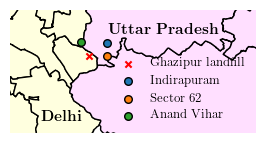

In [217]:
# gdf = gdf[gdf["District"] == "Delhi"]

latexify()
fig, ax = plt.subplots()
# set background color
# fig.patch.set_facecolor('#AFDFFF')
gdf[gdf["STATE"] == "DELHI"].plot(color="#FFFFDF", edgecolor="k", ax=ax)
gdf[gdf["STATE"] == "UTTAR PRADESH"].plot(color="#FFDFFF", edgecolor="k", ax=ax)
# format_axes(ax)
# set axis off
ax.set_axis_off()
ax.scatter(77.328109, 28.625020, c='r', s=20, label="Ghazipur landfill", marker='x')

sid = 0
for station, name in zip(["Indirapuram_Ghaziabad_UPPCB", "Sector_62_Noida_IMD", "Anand_Vihar_Delhi_DPCC"], ["Indirapuram", "Sector 62", "Anand Vihar"]):
    ax.scatter(ds.lon.sel(station=station).values, ds.lat.sel(station=station).values, label=name, marker='o', c=f'C{sid}', s=30, edgecolor='k')
    sid += 1
ax.set_xlim(77.2, 77.6)
ax.set_ylim(28.5, 28.7)
# remove the legend frame
ax.legend(loc="lower right", frameon=False)
ax.set_aspect('equal')
ax.text(77.25, 28.52, "\\textbf{Delhi}", fontsize=11)
ax.text(77.36, 28.66, "\\textbf{Uttar Pradesh}", fontsize=11)
fig.tight_layout()
fig.savefig("ghazipur_locs.pdf", bbox_inches='tight', pad_inches=0)

In [218]:
ds.resample(time="1Y").mean("time")

<xarray.Dataset>
Dimensions:                    (station: 46, time: 2)
Coordinates:
  * station                    (station) object 'Alipur_Delhi_DPCC' ... 'Wazi...
    lat                        (station) float64 28.82 28.65 ... 28.67 28.7
    lon                        (station) float64 77.15 77.32 ... 77.32 77.17
    elevation                  (station) float64 232.7 228.1 ... 227.6 236.9
    pop_1km                    (station) float64 5.191e+03 ... 1.543e+05
    pop_2km                    (station) float64 2.459e+04 ... 5.677e+05
    pop_3km                    (station) float64 5.667e+04 ... 1.084e+06
    pop_4km                    (station) float64 1.033e+05 ... 1.754e+06
    pop_5km                    (station) float64 1.623e+05 ... 2.549e+06
    pop_10km                   (station) float64 1.312e+06 7.27e+06 ... 7.51e+06
    d_motorway                 (station) float64 0.09983 0.01972 ... 0.1144
  * time                       (time) datetime64[ns] 2022-12-31 2023-12-31
Data variables: (12/417)
    TSURF_K                    (time, station) float32 nan nan ... 304.8 305.0
    SNOWEW_M                   (time, station) float32 nan nan nan ... 0.0 0.0
    SNOWAGE_HR                 (time, station) float32 nan nan nan ... 0.0 0.0
    PRATE_MMpH                 (time, station) float32 nan nan ... 0.0209
    CLOUD_OD                   (time, station) float32 nan nan ... 7.252 6.859
    U10_MpS                    (time, station) float32 nan nan ... 0.2311
    ...                         ...
    UWIND_MpS_LAY0_lag_1       (time, station) float32 nan nan ... 0.2167
    UWIND_MpS_LAY0_lag_2       (time, station) float32 nan nan ... 0.2165
    UWIND_MpS_LAY0_lag_3       (time, station) float32 nan nan ... 0.2163
    UWIND_MpS_LAY0_lag_4       (time, station) float32 nan nan ... 0.2164
    UWIND_MpS_LAY0_lag_5       (time, station) float32 nan nan ... 0.0164 0.2165
    UWIND_MpS_LAY0_lag_6       (time, station) float32 nan nan ... 0.2167
Attributes: (12/33)
    IOAPI_VERSION:  $Id: @(#) ioapi library version 3.0 $                    ...
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2023264
    CTIME:          73659
    WDATE:          2023264
    ...             ...
    VGLVLS:         [0. 0.]
    GDNAM:          ????????????????
    UPNAM:          CAMx2IOAPI      
    VAR-LIST:       TSURF_K         SNOWEW_M        SNOWAGE_HR      PRATE_MMp...
    FILEDESC:       I/O API formatted CAMx AVRG output                       ...
    HISTORY:

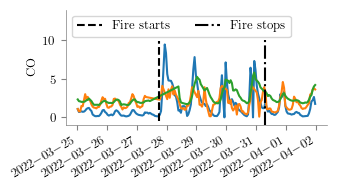

In [219]:
ghazipur_m28 = ds.sel(time=slice("2022-03-25", "2022-04-01"))

latexify(fig_height=2)
fig, ax = plt.subplots()
pol = "CO"
ghazipur_m28.sel(station="Indirapuram_Ghaziabad_UPPCB")[pol].plot(c="C0")
ghazipur_m28.sel(station="Anand_Vihar_Delhi_DPCC")[pol].plot(c="C1")
ghazipur_m28.sel(station="Sector_62_Noida_IMD")[pol].plot(c="C2")

ax.vlines(ghazipur_m28.time.values[24*3-7], *ax.get_ylim(), color="k", linestyle="--", alpha=1, label="Fire starts")
plt.vlines(ghazipur_m28.time.values[24*6+7], *plt.ylim(), color="k", linestyle="-.", alpha=1, label="Fire stops")
ax.set_title("")
ax.set_xlabel("")
# put legend into two columns
ax.legend(ncol=2, loc="upper left")
ax.set_ylim(-1, 14)
format_axes(ax)
fig.savefig("ghazipur_co.pdf", bbox_inches='tight', pad_inches=0)

In [17]:
allds = xr.open_dataset("/home/patel_zeel/aqmsp/aqmsp_data/datasets/cpcb/cpcb_17_to_23.nc")
(allds["PM2.5"].sel(time="2019").isnull().sum(dim="time")/8760 < 0.1)

<xarray.DataArray 'PM2.5' (station: 65)>
array([ True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
       False, False,  True,  True,  True, False,  True,  True, False,
       False,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True])
Coordinates:
  * station    (station) object 'Alipur_Delhi_DPCC' ... 'Wazirpur_Delhi_DPCC'
    lat        (station) float64 ...
    lon        (station) float64 ...
    elevation  (station) float64 ...
    pop_1km    (station) float64 ...
    pop_2km    (station) float64 ...
    pop_3km    (station) float64 ...
    pop_4km    (station) float64 ...
    pop_5km    (station) float64 ...
    pop_10km   (station) float64 ...

In [18]:
", ".join(list(allds.data_vars))

'PM2.5, PM10, NO, NO2, NOx, NH3, SO2, CO, Ozone, Benzene, Toluene, Xylene, O, Eth-Benzene, MP-Xylene, AT, RH, WS, WD, RF, TOT-RF, SR, BP, VWS'

In [21]:
import pandas as pd
counts_ds = allds.resample(time="1Y").mean("time")["PM2.5"].notnull().sum(dim="station")
counts_ds["time"] = counts_ds["time"] - pd.Timedelta("365D")

latexify()
fig, ax = plt.subplots(figsize=(3.38, 2.5))
counts_ds.plot(ax=ax, c="k", marker="o", linestyle="--")
ax.set_xlabel("Year")
## annotate the points
for i, year in enumerate(counts_ds.time.values):
    ax.text(year+pd.Timedelta("115d"), counts_ds.isel(time=i).values-8, str(counts_ds.isel(time=i).values), ha="right", va="bottom")

plt.ylim(13, 70)
plt.ylabel("Number of stations")
format_axes(ax)
fig.savefig("cpcb_stations_count.pdf", bbox_inches='tight', pad_inches=0)

In [223]:
tmp_df = ds.to_dataframe().reset_index()
tmp_df = tmp_df[tmp_df["PM2.5_missing"] == False]
tmp_df = tmp_df[tmp_df["time"] > "2023-07-18"]
# np.corrcoef(tmp_df["PM2.5"], tmp_df["T2_K"])

corr_df = {}
for var in list(ds.data_vars):
    corr_df[var] = tmp_df[var].corr(tmp_df["PM2.5"])
    # if nan, replace with 0
    if np.isnan(corr_df[var]):
        corr_df[var] = 0
    
# sort the dictionary
corr_df = dict(sorted(corr_df.items(), key=lambda item: item[1], reverse=True))
corr_df

/home/patel_zeel/miniconda3/envs/torch_gpu_py311/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/patel_zeel/miniconda3/envs/torch_gpu_py311/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


{'PM2.5': 0.9999999999999999,
 'PM10': 0.9004167810336903,
 'dayofyear': 0.6652214674012072,
 'PRESS_MB_3d': 0.6607247454793046,
 'PRESS_MB_LAY0': 0.6597799386059099,
 'PRESS_MB_3d_lag_1': 0.6568351838069636,
 'PRESS_MB_LAY0_lag_1': 0.6556603945208709,
 'PRESS_MB_3d_lag_2': 0.6502315266566925,
 'PRESS_MB_LAY0_lag_2': 0.6486897900547659,
 'PRESS_MB_3d_lag_3': 0.6418195990920472,
 'PRESS_MB_LAY0_lag_3': 0.6398188845179726,
 'PRESS_MB_LAY19': 0.6390654785308572,
 'PRESS_MB_LAY19_lag_1': 0.6360309865904691,
 'PRESS_MB_3d_lag_4': 0.6329967802393818,
 'PRESS_MB_LAY19_lag_2': 0.6307930427817247,
 'PRESS_MB_LAY0_lag_4': 0.6305177566885573,
 'PRESS_MB_3d_lag_5': 0.6255527457403293,
 'PRESS_MB_LAY19_lag_3': 0.6240835196004539,
 'PRESS_MB_LAY0_lag_5': 0.62267288423416,
 'PRESS_MB_3d_lag_6': 0.6209316112972224,
 'PRESS_MB_LAY0_lag_6': 0.6178092835535453,
 'PRESS_MB_LAY19_lag_4': 0.6170119902422665,
 'PRESS_MB_LAY19_lag_5': 0.6110052316593633,
 'PRESS_MB_LAY19_lag_6': 0.6072242140267146,
 'HUMID_PP

In [237]:
pollutants = ["NO2", "CO", "NH3", "SO2", "NOx"]
for var in pollutants:
    for lag in [1, 2, 3, 4, 5, 6]:
        allds[f"{var}_lag_{lag}"] = allds[var].shift(time=lag)
        
df = allds.to_dataframe().reset_index()
df = df[df["PM2.5"].notnull()]

def get_lagged_corr(df, var):
    df = df[df[var].notnull()]
    
    lagged_corr = {0: df[var].corr(df["PM2.5"])}
    for lag in [1, 2, 3, 4, 5, 6]:
        df = df[df[f"{var}_lag_{lag}"].notnull()]
        lagged_corr[lag] = df[f"{var}_lag_{lag}"].corr(df["PM2.5"])
    return lagged_corr

corr_df = pd.DataFrame(index=range(7))
for var in pollutants:
    corr_df[var] = get_lagged_corr(df, var).values()

,NO2,CO,NH3,SO2,NOx
Lag,,,,,
0,0.36,0.41,0.26,0.15,0.40
1,0.38,0.44,0.27,0.14,0.42
2,0.38,0.44,0.26,0.13,0.42
3,0.37,0.42,0.24,0.11,0.40
4,0.36,0.40,0.23,0.10,0.38
5,0.34,0.37,0.22,0.09,0.35
6,0.33,0.35,0.21,0.08,0.33


In [241]:
corr_df.index.name = "Lag"
print(corr_df.style.format("{:.3f}").to_latex())

\begin{tabular}{lrrrrr}
 & NO2 & CO & NH3 & SO2 & NOx \\
Lag &  &  &  &  &  \\
0 & 0.362 & 0.410 & 0.264 & 0.148 & 0.399 \\
1 & 0.383 & 0.439 & 0.265 & 0.145 & 0.421 \\
2 & 0.384 & 0.438 & 0.256 & 0.127 & 0.419 \\
3 & 0.375 & 0.421 & 0.244 & 0.109 & 0.403 \\
4 & 0.361 & 0.397 & 0.232 & 0.097 & 0.380 \\
5 & 0.345 & 0.372 & 0.221 & 0.088 & 0.354 \\
6 & 0.331 & 0.349 & 0.212 & 0.083 & 0.330 \\
\end{tabular}



: 

In [231]:
df["PM2.5"].corr(df["CO"]), df["PM2.5"].corr(df["CO_lag_1"]), df["PM2.5"].corr(df["CO_lag_2"]), df["PM2.5"].corr(df["CO_lag_3"]), df["PM2.5"].corr(df["CO_lag_4"]), df["PM2.5"].corr(df["CO_lag_5"]), df["PM2.5"].corr(df["CO_lag_6"])

(0.40899215922920623,
 0.43328709856525544,
 0.43020147207292336,
 0.41297484304005205,
 0.3894849714542094,
 0.3646589395369373,
 0.34080340895271277)

## Plot population

In [18]:
import rasterio
pop_data = rasterio.open("/home/patel_zeel/aqmsp/aqmsp_data/datasets/cpcb/landscan-global-2022.tif")
pop_np = pop_data.read(1)
lats = pop_data.xy(np.arange(pop_np.shape[0]), 0)[1]
lons = pop_data.xy(0, np.arange(pop_np.shape[1]))[0]
pop_ds = xr.Dataset({'population': (['lat', 'lon'], pop_np)},
                    coords={'lat': lats, 'lon': lons})
pop_ds['population'] = pop_ds['population'].where(pop_ds['population'] >= 0)
pop_ds

<xarray.Dataset>
Dimensions:     (lat: 21600, lon: 43200)
Coordinates:
  * lat         (lat) float64 90.0 89.99 89.98 89.97 ... -89.98 -89.99 -90.0
  * lon         (lon) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Data variables:
    population  (lat, lon) float64 nan nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0

In [19]:
delhi = gdf[gdf["STATE"] == "DELHI"]

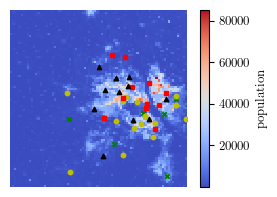

In [74]:
latexify(fig_width=3.37, fig_height=2, columns=1)
# plot delhi
fig, ax = plt.subplots(figsize=(3.37, 2.3))
delhi.plot(color="none", edgecolor="k", ax=ax)

# take a intersection of the population data within delhi shapefile
pop_ds['population'].sel(lat=slice(29.0, 28.3), lon=slice(76.7, 77.4)).plot(ax=ax, cmap="coolwarm", add_colorbar=True)

station_pm = ds["PM2.5"].mean("time")
min_pm = station_pm.min().values
max_pm = station_pm.max().values
# normalize the pm values
station_pm = (station_pm - min_pm) / (max_pm - min_pm)
# print(station_pm)
s25 = station_pm[station_pm < 0.25]
plt.scatter(s25.lon, s25.lat, c="g", s=10, label="PM2.5 $<$ 25%", marker="x")
s50 = station_pm[(station_pm >= 0.25) & (station_pm < 0.5)]
plt.scatter(s50.lon, s50.lat, c="y", s=10, label=r"25\% $\le$ PM2.5 $<$ 50\%", marker="o")
s75 = station_pm[(station_pm >= 0.5) & (station_pm < 0.75)]
plt.scatter(s75.lon, s75.lat, c="r", s=10, label="50\% $\le$ PM2.5 $<$ 75\%", marker="s")
s100 = station_pm[station_pm >= 0.75]
plt.scatter(s100.lon, s100.lat, c="k", s=10, label="PM2.5 $\ge$ 75%", marker="^")
# ax.legend(loc="upper left", frameon=False, ncols=1);
ax.set_aspect("equal")
ax.axis("off")
plt.savefig("delhi_population_pm.pdf", bbox_inches="tight", pad_inches=0)

In [49]:
station_pm

<xarray.DataArray 'PM2.5' (station: 46)>
array([0.57315948, 1.        , 0.25603492, 0.52735253, 0.18150454,
       0.87155142, 0.33857217, 0.46128546, 0.62287942, 0.33394575,
       0.68305745, 0.        , 0.99445272, 0.43972892, 0.38720988,
       0.24681462, 0.12879261, 0.5586436 , 0.39609096, 0.87620254,
       0.88588542, 0.22918293, 0.7215059 , 0.03215271, 0.86372576,
       0.48875514, 0.52604841, 0.70733706, 0.83881868, 0.45431135,
       0.78642755, 0.76570608, 0.14170988, 0.32823448, 0.14806285,
       0.33931987, 0.77140429, 0.43359585, 0.68576121, 0.49106998,
       0.66549856, 0.32201767, 0.40617127, 0.41004501, 0.70349046,
       0.88852888])
Coordinates:
  * station     (station) object 'Alipur_Delhi_DPCC' ... 'Wazirpur_Delhi_DPCC'
    lat         (station) float64 28.82 28.65 28.67 28.7 ... 28.66 28.67 28.7
    lon         (station) float64 77.15 77.32 76.93 77.18 ... 77.36 77.32 77.17
    elevation   (station) float64 ...
    pop_1km     (station) float64 ...
    pop_2km     (station) float64 ...
    pop_3km     (station) float64 ...
    pop_4km     (station) float64 ...
    pop_5km     (station) float64 ...
    pop_10km    (station) float64 ...
    d_motorway  (station) float64 ...